In [16]:
import socket
import sys
import binascii
import numpy as np
import matplotlib.pylab as plt
import math
import codecs
import re
from Area import Area
from Punto import Punto

In [2]:
def introduceAreas():
    numero_areas=int(input('número de Areas: '))#.split(',')
    numero_vertuces=numero_areas*4
    areas=list()
    for j in range(1,numero_areas+1):
        print('coordenadas del área '+str(j)+':')
        user_input = Area()
        user_input.setLimites()
        areas.append(user_input)
    return areas

In [3]:
areas_input=introduceAreas()

número de Areas: 2
coordenadas del área 1:
intriduce coordenada X e Y separadas por "," 1:1,2
intriduce coordenada X e Y separadas por "," 2:2,3
intriduce coordenada X e Y separadas por "," 3:3,4
intriduce coordenada X e Y separadas por "," 4:4,5


coordenadas del área 2:
intriduce coordenada X e Y separadas por "," 1:5,6
intriduce coordenada X e Y separadas por "," 2:6,7
intriduce coordenada X e Y separadas por "," 3:7,8
intriduce coordenada X e Y separadas por "," 4:8,9




In [4]:
for e in areas_input:
    for p in e.getLimites():
        print(p.getX(),p.getY())

1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9


In [5]:
# Se crea el socket
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Se conecta y se comprueba que la conexión se realizó con exito
server_address = ('192.168.0.10', 10940)
print (sys.stderr, 'connecting to %s port %s' % server_address)
try:
    sock.connect(server_address)
except socket.timeout:
    print('Error de conexion')
try:
    
    # Envio del mensaje (000EAR02 - Envio continuo de información de escaneo)
    message = [bytes([2]),chr(48),chr(48),chr(48),chr(69),chr(65),chr(82),chr(48),chr(50),binascii.unhexlify(b"00"),binascii.unhexlify(b"83"),bytes([3])]
    b = bytearray()
    b.extend(map(ord, message))
    print (sys.stderr, 'sending "%s"' % b)
    sock.send(b)

    # Se recoge la respuesta (En este caso la información de lectura del láser)
    num_sens=2
    amount_received = 0
    amount_expected = 4500*num_sens
    print (sys.stderr, 'reciving "%s" bytes' % amount_expected)
    sens=""
    while amount_received < amount_expected:
        data = sock.recv(32)
        #A demas de imprimirse para ver su correcto funcionamiento se almacena en forma de cadena
        sens+= data.decode('utf-8')
        amount_received += len(data)
        print (sys.stderr, 'received "%s"' % data)
    print(len(sens))
finally:
    print (sys.stderr, 'closing socket')
    sock.close()

<ipykernel.iostream.OutStream object at 0x0000019B39164F98> connecting to 192.168.0.10 port 10940
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> sending "bytearray(b'\x02000EAR02\x00\x83\x03')"
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> reciving "9000" bytes
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> received "b'\x020010AR02126B28\x03'"
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> received "b'\x02111BAR0200000000011110000000000'"
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> received "b'00002C443C000000000183018501B701'"
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> received "b'C201C401CA01DB01F701FD0202020001'"
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> received "b'AD019901B602420278029102A602BB02'"
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> received "b'BB027E02AE032705130559059005B805'"
<ipykernel.iostream.OutStream object at 0x0000019B39164F98> received "b'C205

In [6]:
#Cadena con toda la información enviada por el láser
#sens='\x020010AR02126B28\x03\x02111BAR0200000000011110000000000000005DA000000000001AA0194019901B902200239023E0224019B019B0208029902AE02CD02E602F503CC04D004FF04CE04FB04FE04F605130573058905B005D305B705BC05A505A605910596059205B804C902EA027F027F02C103E90406040803FC040103C4039D038A033902BC028502DC0341035603560348032703170319030B02CE025A02500252027502B8029E0247023F024C025E02550243024202440297030F030F02E8027D0274027E02E102E602DF02D502D002B5027B026E02680244023C023C025A029E029802750275027502680241023F02500258026B029602A702A802AB02AB02A1029B02880287027B026D025E024B024A024202380220021F02180204020201F801F401E701E001D101CD01C601C001BD01B901B401B301B101A601A0019F0199018F018F018E01850185018501800179017801780175016F0168016201620168016201620162015A01590159015801580146014801480147014301430143013E013E013E013B0139013601350134013201320127012701250121011D011D0119011901180116010A00FE00F700EF00EB00EB00EB00E600E300DB00DB00DD00E000E500E900EE00F000F000E800E000DF00E200E400EC00ED00ED00E400E400EC00ED00EC00E700E500EA00EA00EA00E000E000E800E000DF00E000DF00DF00DF00D600D600D600DE00DC00DC00D300D800D800D000CF00CD00D300D300D300CA00CD00CA00C500C800CD00CD00CE00CE00C700C600C400C200C300C300BE00BE00BE00C200C600C600BC00BC00C300C300BA00BA00BB00BC00BA00BB00BC00BC00BC00B500B500B300B300B300B700B700B600B300B700B700B600B000B700B700B000AA00AA00AA00AA00AA00B100B100B100B200B200B100B100B100B100AC00AC00B100B100B100AC00B100B100AC00AC00AC00AC00AC00AC00AC00AC00A800A800A800A800A800A0009F00A800A800A200A200A000A000A000A800A000A000A0009F009D0097009F00A000A000A0009F009700970097009F009F009B0097009700A000A000970097009700970097009B009B00A0009B009B0097009B009B009B00950095008E00920097009700940091008E008E008E008E009200940094008E008F009200930093009300960094009400940094008D008D008D008E009200970098009000900090009100910091008D008F00900090008C008C009200920091009100880088008D00900090008F008E008F009700930098009800950095008D008E008B008B008E0091008D008F008E0092009200940094009700970097009700970097009700920092009200970092009700970095009F00970097009700A000A000A000A000A000A000A000A000A000A000A000A000A000A000A000A0009B009F009F009F009D009D009F00A000A000A000A000A200A200AB009F00A0009F009F009F009F009F00AB00AB00A400A800A800AB00AB00AC00AC00AC00AC00AC00AC00AC00AC00AC00A800A800A800A800AB00AB00AB00AF00B400AF00B200B400B400AD00AD00B200AB00AB00AF00B900BA00B900B500B600B900B800B500B400B500B800B800BF00B700B700B700BE00BD00BE00BD00BD00BD00C500C800C800C400C400C700C700CD00CD00C700C600C600C500C700CF00CF00C700C700CE00CE00CE00CE00D300D300D600D600D000D000D000D600D600D600D600D600D600DF00E000E000E000E900E900E900E900E600E600F400F400ED00ED00F500F800F800F800F100F800F800F800F800F200FB00FC00F500F500FD00FE01060107010B010E010E0107010B0116010F01140116011D011D012301230121012101250125012D012D012D01290129012D012E0139013401330136013E013E013C013C014001400148014E014F014F01520152015301570157015A015A015C0161016701700176016F016B016B016E01700170017B01790176017901840188019901940194019401A001A201A601AF01AF01AE01AF01C401C401C301CA01D501D601DA01E601EE01EF01F90206020F021102260234023E02500250025B026B0284028A029702AD02BC02D802FA03060315032903410355036303760370036F036F036E036D036E0370036E03680361035E0348034502C1021D01D401D201F0026D02DE02E902DD02CA02B202A2024E01830148011600FB00EE00E700E700E600E800E700E700E400D500DE00DC00DB00D500D500CF00DB00D300D100CF00CD00C400C400C900C400C400BF00BF00BA00BA00C200C100BF00BF00BE00BD00BD00B500B400B300AA00AC00AC00AC00AD00AD00AC00A500A500A5009C009C00A200A500A5009F009F009F009F009F00980098009C009A00A100A000A0009D009900970099009900960092008C008C008D008D008C008C008C008D008D008D009600960096009600970097009700960092008E008D008D008E008E008F008F008E008E0089008900890089008E008D008C008C008C00840089008900890089008C008C008A008A008A008A0089008A008A008A008A008A0086008A008A008A008B008B008200820082007A007A007B0084007B007B007B007B007C007C007C007C007B007C008100810081008100810081007E007E007E007E007E00840084007E007C007500730071007300730073007500750075007C007C00780078007700760071007100680068006800680066006B006C006C006C00710071006C006C006E006C006C00680068006800680068006B0071006B007100780078007C007C00780076007400740079007B007D0083008A008B008A008800880089008B008B00900090008D0088008F00C50140017F01B601EB021B027102F0044D047C048804A204AA04B2050605CA0ADC0AF20AF2066606660C960CE20CCC0BEF0BED0BF40CDA0CF50CF50CEE0CEA0CE10CDA0CD70CCC0CC80CC00CC00CB10CA20CA10C9D0C8E0C8B0C810C780C8A0CB10CC20CEB0D110D430D4306B706AD0641064306350623062406270627062E06380636063C06350662AE78\x03\x02111BAR0200000000011110000000000000005DA1E0000000001AA0188018801BA021F02410241022F019301930219029C02BA02CE02E7030703CE04C604F704CC04FD04FE04F20513056C058E05B805DB05CF05C505AC05AF05900596059105B904D502E3027A027A02DA03DD040603FE03F203F203C2039D0390033102C1028E02E6033F034C03540349032203160316031202C0025A02490249027F02AF02A7024C023B023E02580258023F023F02420293030E031002E902850278027E02D002DD02DB02CC02CA02B6027302720271025102410241025C02A7029202750275027E0268024A02440250025E026802A102A902A902AC02A6029B0292028D028402730264025A024B024B022E022902200218020A020101FE01ED01EB01E701E301D601D201C801C301BC01B801AA01A901A4019701960196019F019901990189018501850185018401800180017901760172016C016C016901670160015D015801560156014F014F014D014D0149014D0147014701450140013C013B013B013A013B0139013B013901390135012F012F012E012E0125012501250124011D01160111010300F700EF00EE00EF00E900E800E500E000DD00DD00E200E600E900F100F100EB00E100E100E100E300EA00EE00EE00EE00EE00EE00EE00EE00EE00EE00EE00E300E200E100E100E000DE00DE00E000E000E000E000E000DC00D700D700E000DF00DC00D500D300D300D300D300D300D400D100D400CE00D400D400CB00C600CB00C600C400C600CE00CE00CE00C800C800C100BF00BC00BF00BF00C000BB00BB00C300C500C400C400BC00BC00BC00BC00BC00B400B300B500B500B500B400B100B100B200B200B400B800B200AF00B000B700B300B400B400B400B400B400B400B400AC00AC00B100B100B100B100B500B100B100B100B100B100B000B100AE00AE00A900A900A900A900A500A500A900A300A000A000AC00AC00AC00AC00A300A300A300A100A500A300A300A900A300A100A0009800A300A300A100A100A100A100A100A100A100A100A10098009500A000A000A000A000A000980098009C009C009C009700970098009800970097009400940097008E0095008E009500950095009000900090008C008C0095008E008C008C009300950093008F00930097009700970095008D008D008D008B00860090009000900091009800910099009100910092009200910091008800880089009300930093008A008A00910091008D0091009100910091009800980097008F008F009500950091009A009A00940094008B00960095009300930097009700920090009500970097009700930093009300920093009800980098009800980098009C009C009800980098009C00A10098009800A100A100A100A100A100A100A100A100A100A000A000A100A100A000A000A0009D00A100A900A900A900A900AC00A900A900A300A100AC00AC00AE00A900A900A900AC00AC00A900A900A500A500A900A900A900AE00AE00AE00AE00AE00AE00B100B100B100B500B500B500B100B500B500B500B500B500B500B500B500BB00BB00BB00BA00BB00BA00BA00B900B400B900B900BF00BF00BA00B700B700B500B500B700BE00BF00B600B600C600C600C600C600C500C500C600C900C900C900C400CC00CC00CC00CC00CC00CB00CB00C800D000CF00CF00CD00CF00CF00DA00DA00DA00D400D400D300D700D800DD00DD00D700D700D800DE00DE00E100E100E900EA00ED00F100F100F100F800F800F100F100F100F100F900FB00F900F200F400F400F600FD00F900F900FB00FD00FE00FE01060108010D010F010B011601110111011D011D011D011A0125012501220125012B012B01250125012D012D012D012D012D012E0133013E013E013601360142014101400148014801480145014D014D0155015701570157015C015E0160015F015F0166016A016B016C016B017201720172017B0178017801780185019201930192019D019F019F01A501B401B401B701B801B801BD01CA01CA01D201D501DD01DE01E801F801F801FC02050210021B02270237024402470260026902700286028A029B02B302CA02DF02F8030E031903330342035A036A0386038603710370037003700371037103690364035F035A0349034402C2021F01D401D401F2026402D602DD02D602CA02B202A4024201930140011E00FF00F200F000F200F200F200E700E000E000DD00DD00DC00DF00DB00DB00D800D400D300D200D000D000CA00CD00CD00C400C400C400C400BD00BB00BE00BE00B800B800BE00B500B200B200B600AD00AC00AB00AB00A800AE00A500A500A500A500A500A500A500A5009F009F00A300A400A400A400A500A500A5009A009A009A009700A3009E00970097009700980098009500980095009500950093009600990097008E008E008E008E008B008B008F008E008B008B008C008F008F00930092008A008A008E008E008A008A008A008B008B008A0085008B008B008D008D008E008E008700860086008A008D008F008B008B008C008C008400860086008300820082008200800080008000800080007B007C007C007C0085007C007C007C0080007D007D007D007D007D007D008600860086008200830083008300830083007E007E007E007F007F007F007F007F007F007D007D007D007D00790079007900760076007800770072007700740072007200720072006F00720072007200720077006D00720072007200720072006D007200720072006D00690072007200790079007D007B007B007B007B0075007400740074007E007F0088008F008D008500850086008B008B0087008500830083009000DB014A018E01B501E9021B0273031904420473048B04A104AC04BD04E205D10ADB0AF30AF3065D065D0C910CEE0CD50BEC0BE00BEC0CD70CFB0CF40CF30CEE0CDE0CD20CD20CD00CC90CB90CB20CAF0CA20C9C0C940C800C800C800C790C820CAE0CD20CF50D1E0D3F0D3F06BC06B40638063F062E062106270629062A062F06310636063D06470661554A\x03\x02111BAR0200000000011110000000000000005DB240000000001AA0188018801BD02230239023F022C019B019B020802A102BE02D402E402FF03D704CE04F504D604F804FC0501052D057B058505C605DA05BF05CA05A405B1058D059D059405C004CD02ED0286028602B503E903FB03F2040403F103BE038F038A032B02AD02'
sens

'\x020010AR02126B28\x03\x02111BAR020000000001111000000000000002C443C000000000183018501B701C201C401CA01DB01F701FD0202020001AD019901B602420278029102A602BB02BB027E02AE032705130559059005B805C205A705B60597059505690565057B05E205E2052A02DE0287028702C0038D040803FE03F803AF0399038C0380035702F1028E028702B7030203390313030C030F030C02CA025202520258027902C2029502430239023C025B024E023B02390241029E030A030A02E80284026C027902DD02DD02CD02C502C002B3026E026E026D0243023B023B026102A8029A027402710274026102410241024A0256027D02AE02B002B002B202A6029B0295028C0285026E02620257024C023E02380226021D02150213020601FE01F501ED01EA01D901D601CE01CE01C701C301BC01BC01B901B101A601A201A1019B0198019201870186018601860184017E0176017D016F016F016901690166015D015E015D015601530152014C014B014D014D014A014A01480140013F013F013A013A013201320132012E012C012C012B012301230123012201210119011801160112011601160115010A00FC00EE00E800E700E600DB00E000E000E000E000E100E200E100DF00E500E000E000DB00D800D800E000E800E200E200E200E200DC00DC00DE00E000E200E700E7

In [14]:
# Se separa los datos del resto de información enviada por el laser
sensing=re.split('\x02|\x03',sens)
#sensing = '000012BA1000000000011E011E0120012201200120011E011C0124011F011A011A012101210120011D0120011E011D011D011B011B011E011E011C01210125012501230121012301230123012501200120011B011C011C011E011C01230120012001200120012001280128011F011F0121012301230123012701270129012B012B012901290123012D012301230129012C012C012C012F013201320132013201320135012F0134013401380AC20AD00AE80B090B160B200B380B400B490B4A0B530B550B550B550B020AE80AE80AFB0B5A0B6D0B790BD70BEB0BF80C150C310C4D0C5B0B6B0AAF0AA80AA109B20756075607370734072707150721072107290727072A0733073D074D075B076107700771078D0791079F07BB07DF092F0C660C660C5A0C5A0D630DB00DE10DFE0E140E390E590E760E920EB70EE10F010F010D460D1E0D1A0D150D110D090D010CF90CF90CE90CE90CE80CE60CE20CDC0CD80CD20CD20CD00CC20CBB0CB80CAB0CA30C990C910C910C8D0CB30CD00D0F0D160D120D0A0D020CF80CF80CEF0CEB0CE70CE70CE40CE10CDD0CDA0CD80CD30CD20CD00CD00CC30CC00CBD0CB60CB20CB00CB40CB40CB20CAA0CAA0CA50CA50C9B0C9C0C9C0CA30C970C910C920C920C930C900C900C8F0C8D0C8D0C8D0C840C880C880C810C7E0C780C770C770C770C770C710C700C670C670C5C0C530C510C510C4D0C530C4E0C4E0C500C500C4E0C4E0C4D0C4D0C4A0C4A0C530C5B0C600C750C780C780C780C7E0C7E0C7B0C7B0C7A0C7B0C7D0C7D0C7D0C850C850C880C880C860C850C860C8E0C8C0C8C0C900C990CA10CEE0E2A0E360E3E0E440E4C0E4C0E4C0E570E570E570E5A0E5A0E5C0E630E650E6A0E700E6D0E6D0E770E790E820E890E890E8F0E950E960E9B0E9C0E9E0EAB0EAB0EAB0C03092F08FD08F908FF09610D7C0D940D770D880D830D8D0D870D9C0D910D970D940DA30DAC0DBF0DB20DCD0DCD0DC20DD60DE1065B063D063B064906510656063704AB04590428041E0418040903FC03F603EF03EA03E903DA03D403CD03C503BF03BF03AF03A903A9039F039B039A03950395038C0383037F037B037103700371036F036C0367035C0359035903530353035C036603640364034E034A034C034C034C035C043F05AC05F3060C0608060A05F805ED05F505F405EE05EB060706190615061C0626062206300638063D0643064F0658065006590658065A066706600657067A0685013901390343031D02D2020801990176015701470138013F01440154017301A5020D02E6038703FC05C405BE05E405E205F005EA05EA05ED05DB05D805DF05D405D705CC05C805C005CB05C205BD05C005C305BD05C105AC05B505B005AB05A5059D05A7059F0598059A0594058E0591059705920586058D05940592058C0583057C057C0577056C056E0571056805750575056C05670563055E056A05670568056605670569055D055A052A041A036903380338033903420341032C0319031B0320033A034403400345034E034303160312030B03190328033303470347034403420346036F0374037F03820382038203820385039D03A503B603B903BD03C303CB03CD03D903DC03DF0437044A04490447043E0435043004250425041D041D041904100410040C040A040304050405040103FE03F003F403F403F403F303F003ED03ED03EE04030403040303FC03F803F703F303F203F303F303F303EE03EE03E603E503E503E203E203E203E203DF03DF03D903D303D403D403D403D403D303D203D603EA03F90403040E040E042A042C043704480448045C03F002CB023E01FA01D901720162017F01C901EA01EA01E701E401D401D001D201D701D701D701D101CE01BE01A2019901960194018D018C018A018901880186017E018001860186017E0183017E017D017C017B017B017401740175017201720172016C016C016C015F01610161015E015E015E015E015E015D015C0159014E014E015701570157015E015C015E01690169016A0167015E015201520153015101510144013C013A0136013601370137013601360132012D012D01330136013C013C013C013C013B013B01410141014001420140013F0142014B014E014E015701570157015701570158015E0160016001590161016501660162015D015D01610168017401710166015A015201590157015701570157015701570167017A017A017C017C017D017D017D017D017901730162015901510151015001480148014F01480140013C0139013A013A013C013C013C01410141012E0116010900EC00E700E600E9010C011C01250120011000EC00E600D500D600E100F301060113010300EB00EB00EB00D400C700C900D000DF01290135014601460132010E00FE00FE00FE011E0135014401470147014701450136012D0107010501070120012F01400143014101410132010900C700BA00C600C600EB00FB00F500DD00DD00DD00F1011E01320139013A013B01380136013301380133012301230124013701350133012B00FE00FB00FE0100012B013501350114010300FC011C01330137013801360134013601360132013201320134012C012C012C012C012C012C012C012C012C012C012C01230124012C012C012C012C01250125012401240124012601270124012801240124012401250126012701270127012701260126012101210121012901290122011D01220122012201220122011B0122011B011B0122011B01280128012101200120012801280126012601250124012401240124012401220120011F011F012701270125012501250125012A012A012A012A012301230123012301230123012C012C012C01320132012D012C012C012C012C0134012C012C012D01320132012C012C012C0134012D012D012D012D0133013401340136013601360136013601360136012D0136013601360131013401340134013801380139013A013A013A013A01340135013B013B0135013B013E013C013C013D014001'

In [15]:
sensing

['',
 '0010AR02126B28',
 '',
 '111BAR020000000001111000000000000002C443C000000000183018501B701C201C401CA01DB01F701FD0202020001AD019901B602420278029102A602BB02BB027E02AE032705130559059005B805C205A705B60597059505690565057B05E205E2052A02DE0287028702C0038D040803FE03F803AF0399038C0380035702F1028E028702B7030203390313030C030F030C02CA025202520258027902C2029502430239023C025B024E023B02390241029E030A030A02E80284026C027902DD02DD02CD02C502C002B3026E026E026D0243023B023B026102A8029A027402710274026102410241024A0256027D02AE02B002B002B202A6029B0295028C0285026E02620257024C023E02380226021D02150213020601FE01F501ED01EA01D901D601CE01CE01C701C301BC01BC01B901B101A601A201A1019B0198019201870186018601860184017E0176017D016F016F016901690166015D015E015D015601530152014C014B014D014D014A014A01480140013F013F013A013A013201320132012E012C012C012B012301230123012201210119011801160112011601160115010A00FC00EE00E800E700E600DB00E000E000E000E000E100E200E100DF00E500E000E000DB00D800D800E000E800E200E200E200E200DC00DC00DE00E000E200E7

In [8]:
long, substr = int(len(sensing)), int(len(sensing)/1081)
separated_data=[ [sensing[i:i+substr]] for i in range(0, long, substr) ]

In [9]:
separated_data

[['0000'],
 ['12BA'],
 ['1000'],
 ['0000'],
 ['0001'],
 ['1E01'],
 ['1E01'],
 ['2001'],
 ['2201'],
 ['2001'],
 ['2001'],
 ['1E01'],
 ['1C01'],
 ['2401'],
 ['1F01'],
 ['1A01'],
 ['1A01'],
 ['2101'],
 ['2101'],
 ['2001'],
 ['1D01'],
 ['2001'],
 ['1E01'],
 ['1D01'],
 ['1D01'],
 ['1B01'],
 ['1B01'],
 ['1E01'],
 ['1E01'],
 ['1C01'],
 ['2101'],
 ['2501'],
 ['2501'],
 ['2301'],
 ['2101'],
 ['2301'],
 ['2301'],
 ['2301'],
 ['2501'],
 ['2001'],
 ['2001'],
 ['1B01'],
 ['1C01'],
 ['1C01'],
 ['1E01'],
 ['1C01'],
 ['2301'],
 ['2001'],
 ['2001'],
 ['2001'],
 ['2001'],
 ['2001'],
 ['2801'],
 ['2801'],
 ['1F01'],
 ['1F01'],
 ['2101'],
 ['2301'],
 ['2301'],
 ['2301'],
 ['2701'],
 ['2701'],
 ['2901'],
 ['2B01'],
 ['2B01'],
 ['2901'],
 ['2901'],
 ['2301'],
 ['2D01'],
 ['2301'],
 ['2301'],
 ['2901'],
 ['2C01'],
 ['2C01'],
 ['2C01'],
 ['2F01'],
 ['3201'],
 ['3201'],
 ['3201'],
 ['3201'],
 ['3201'],
 ['3501'],
 ['2F01'],
 ['3401'],
 ['3401'],
 ['380A'],
 ['C20A'],
 ['D00A'],
 ['E80B'],
 ['090B'],
 ['160B'],

In [10]:
def toDecimal(sensin):
    total=[]
    for elem in sensin:
        res=""
        for i in elem:
            t=int(i,16)
            if t > 0x30 and t < 0x39:
                t = t - 0x30
            elif t > 0x41 and t < 0x46:
                t = t - 0x37
            binario = bin(int(t))
            res = res + str(binario)
        total.append(str(int(res,2)))
    return total

In [11]:
final=toDecimal(separated_data)
print(len(final))
#final

1081


In [12]:
def creaangulos(x, y, jump):
    while x < y:
        yield x
        x += jump

In [13]:
angulos=list(creaangulos(-45,225,270/1081))
print(len(angulos))

1081


In [23]:
cartesianos=[]
for i in range(1081):
    p=Punto(int(final[i]),angulos[i])
    cartesianos.append(p)

for p in cartesianos:
        print(p.getX(),p.getY())

0 -45
4794 -44.75023126734505
4096 -44.5004625346901
0 -44.25069380203515
1 -44.0009250693802
7681 -43.75115633672525
7681 -43.5013876040703
8193 -43.25161887141535
8705 -43.0018501387604
8193 -42.752081406105454
8193 -42.502312673450504
7681 -42.252543940795555
7169 -42.002775208140605
9217 -41.753006475485655
7937 -41.503237742830706
6657 -41.253469010175756
6657 -41.00370027752081
8449 -40.75393154486586
8449 -40.50416281221091
8193 -40.25439407955596
7425 -40.00462534690101
8193 -39.75485661424606
7681 -39.50508788159111
7425 -39.25531914893616
7425 -39.00555041628121
6913 -38.75578168362626
6913 -38.50601295097131
7681 -38.25624421831636
7681 -38.00647548566141
7169 -37.75670675300646
8449 -37.50693802035151
9473 -37.25716928769656
9473 -37.00740055504161
8961 -36.757631822386664
8449 -36.507863089731714
8961 -36.258094357076764
8961 -36.008325624421815
8961 -35.758556891766865
9473 -35.508788159111916
8193 -35.259019426456966
8193 -35.00925069380202
6913 -34.75948196114707
7169 -

In [17]:
def apolares(p):
    x=p.getX()
    y=p.getY()
    c1=math.sqrt(x*x+y*y)
    c2=0
    
    if x > 0:
        if y >= 0:
            c2=math.atan(y/x)
        else:
            c2=math.atan(y/x)+2*math.pi
    elif x == 0:
        if y > 0:
            c2= math.pi/2
        if y < 0:
            c2= 3*math.pi/2
        if y == 0:
            c2=0
    elif x < 0:
        c2=math.atan(y/x)+math.pi
    punPol=Punto(c1,c2)
    """elif math.radians(y)> -math.pi and math.radians(y)<=math.pi:
        if x < 0:
            if y >= 0:
                c2=math.atan(y/x)+math.pi
            else:
                c2=math.atan(y/x)-math.pi
        elif x == 0:
            if y > 0:
                c2= math.pi/2
            if y < 0:
                c2= -math.pi/2
            if y == 0:
                c2=0
        elif x > 0:
            c2=math.atan(y/x)"""
    return punPol

In [25]:
polares=[]
xs=[]
ys=[]
for pun in cartesianos:
    punto=apolares(pun)
    xs.append(punto.getX())
    ys.append(punto.getY())
    polares.append(punto)
for p in polares:
        print(p.getX(),p.getY())

45.0 4.71238898038469
4794.208858946226 6.273850945152215
4096.241727628608 6.27232136387035
44.25069380203515 4.71238898038469
44.01228699989596 4.735111863657956
7681.1246027961815 6.277489345301992
7681.123184191455 6.277521861989328
8193.114163890004 6.277906262008418
8705.10621182277 6.278245444990302
8193.111542049488 6.277967231580532
8193.110242550298 6.277997716381165
7681.116212990757 6.277684445604276
7169.123044914572 6.277326429427458
9217.094570066522 6.278655338548148
7937.108511211318 6.277956271086565
6657.127822770521 6.27698838049515
6657.12627966726 6.277025898776529
8449.098288156929 6.278361823278049
8449.097087097834 6.278391384522825
8193.098889690196 6.278272080013956
7425.107768244791 6.277797530983003
8193.09645058719 6.278333049812038
7681.101591045944 6.278042130568735
7425.103768977339 6.277898444767793
7425.102452691362 6.277932082720086
6913.108635817458 6.277579148396992
6913.107240093515 6.277615277564246
7681.09526957072 6.278204715084043
7681.0940296

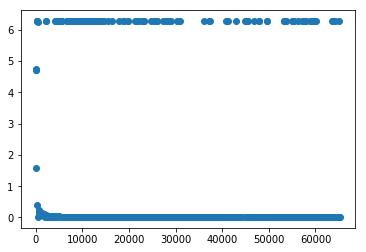

In [19]:
equis= np.array(xs)
ies=np.array(ys)
plt.scatter(equis,ies)#,angulos)
plt.show()

In [ ]:
message = [bytes([2]),chr(48),chr(48),chr(48),chr(69),chr(65),chr(82),chr(48),chr(49),binascii.unhexlify(b"9B"),binascii.unhexlify(b"B1"),bytes([3])]
message 
b = bytearray()
b.extend(map(ord, message))
b